In [1]:
from pixell import enmap, curvedsky
import numpy as np
import healpy as hp
import matplotlib.pylab as plt
import importlib
import pandas as pd
import tools
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# map source, 'Colin' or 'websky'
map_source = 'Colin'
# ksz type , 'lt' for late-time, 'ri' for reionization
ksz_type = 'lt'

# ksz name used in legend and titles
if ksz_type == 'lt':
    ksz_name = 'late-time'
else:
    ksz_name = 'reionization'
# use maps provided by websky
map_path ='./maps/' + map_source +'/'
# path of output data
data_path = 'data/' + map_source + '/'
# path of output plots
plot_path = './maps/'+ map_source + '/'

In [25]:
smooth_ellmin, smooth_ellmax = 20, 6000
smooth_width = 1

In [4]:
# read in ksz, lensed cmb , kappa csv files
ksz = pd.read_csv(map_path + 'ksz_'+ksz_type+'_cl.csv')
lensed = pd.read_csv(map_path + 'lensed_cmb_cl.csv')
kap = pd.read_csv(map_path + 'kappa_cl.csv')
# 
bin_width = 20
bin_ellmin, bin_ellmax = 10, 6100


bin_ells = ksz['ell'].values[bin_ellmin:bin_ellmax+1]
ksz_cl = ksz['Cl'].values[bin_ellmin:bin_ellmax+1]

ells = lensed['ell'].values[bin_ellmin:bin_ellmax+1]
lensed_cl = lensed['Cl'].values[bin_ellmin:bin_ellmax+1]

ells = kap['ell'].values[bin_ellmin:bin_ellmax+1]
kap_cl = kap['Cl'].values[bin_ellmin:bin_ellmax+1]

In [5]:
importlib.reload(tools)
# smooth cls range and width
smooth_ellmin, smooth_ellmax = 20, 6000
smooth_width = 1
# smooth ksz_ri_cl and ksz_lt_cl
S_ksz = tools.bin_smooth(ells, ksz_cl, bin_width)
S_lensed = tools.bin_smooth(ells, lensed_cl, bin_width)
S_kap = tools.bin_smooth(ells, kap_cl, bin_width)

smooth_ells, smooth_ksz_cl = S_ksz.smooth(smooth_ellmin, smooth_ellmax, smooth_width)
smooth_ells, smooth_lensed_cl = S_lensed.smooth(smooth_ellmin, smooth_ellmax, smooth_width)
smooth_ells, smooth_kap_cl = S_kap.smooth(smooth_ellmin, smooth_ellmax, smooth_width)

<module 'tools' from '/global/cscratch1/sd/hongbo/new_reion-lens/tools.py'>

Text(0.5, 0.98, 'Colin power spectra')

Text(0.5, 1.0, 'before smooth, ellmin=10 ellmax=6100')

Text(0.5, 0, '$l$')

Text(0, 0.5, '$Cl_{l}^{kSZ}$')

Text(0.5, 1.0, 'after smooth, ellmin=20 ellmax=6000')

Text(0.5, 0, '$l$')

Text(0, 0.5, '$Cl_{l}^{kSZ}$')

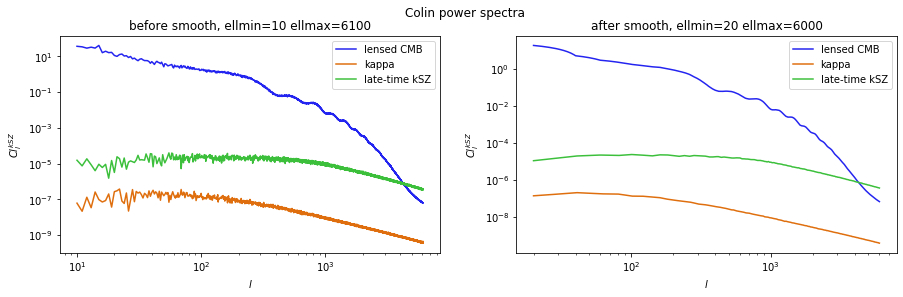

In [6]:
fig, ax = plt.subplots(1,2,figsize=(15,4))

fig.suptitle(map_source + ' power spectra')
ax[0].plot(ells, lensed_cl)
ax[0].plot(ells, kap_cl)
ax[0].plot(ells, ksz_cl)
ax[0].set_title(f'before smooth, ellmin={bin_ellmin} ellmax={bin_ellmax}')
ax[0].legend(['lensed CMB', 'kappa', ksz_name + ' kSZ'])
ax[0].set_xscale('log')
ax[0].set_yscale('log') 
ax[0].set_xlabel('$l$')                                                                        
ax[0].set_ylabel('$Cl_{l}^{kSZ}$')      

ax[1].plot(smooth_ells, smooth_lensed_cl)
ax[1].plot(smooth_ells, smooth_kap_cl)
ax[1].plot(smooth_ells, smooth_ksz_cl)
ax[1].set_title(f'after smooth, ellmin={smooth_ellmin} ellmax={smooth_ellmax}')
ax[1].legend(['lensed CMB','kappa', ksz_name+' kSZ'])
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('$l$')                                                                        
ax[1].set_ylabel('$Cl_{l}^{kSZ}$')      

#plt.savefig(plot_path + 'ps.png')

In [19]:
# concatenate the power spectrum, so it ranges from 0
smooth_ksz_cl = np.concatenate([np.zeros(smooth_ellmin), smooth_ksz_cl])
ksz_cl = np.concatenate([np.zeros(bin_ellmin), ksz_cl])[:smooth_ellmax]
smooth_lensed_cl = np.concatenate([np.zeros(smooth_ellmin), smooth_lensed_cl])
smooth_ells = np.concatenate([np.zeros(smooth_ellmin), smooth_ells])

# generate ksz gaussian alm from the smooth ksz cl
ksz_g_alm = hp.synalm(smooth_ksz_cl) 
#ksz_g_alm = hp.synalm(ksz_cl) 

/global/homes/h/hongbo/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


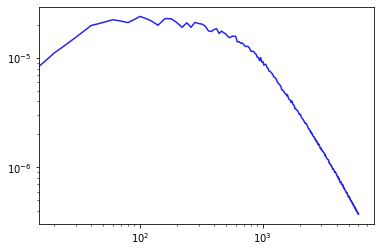

In [20]:
df = pd.DataFrame({'ells':smooth_ells, 'Cl':smooth_ksz_cl})
df.to_csv(plot_path + 'smooth_ksz_cl.csv')
plt.loglog(smooth_ells, smooth_ksz_cl)

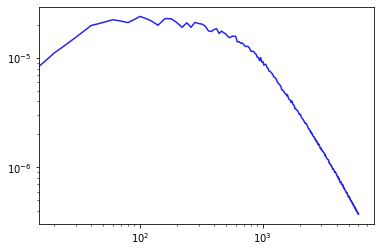

In [22]:
data = pd.read_csv('maps/Colin/smooth_ksz_cl.csv')
plt.loglog(data['ells'], data['Cl'])

Text(0.5, 1.0, '$C_{l}^{kSZ}$')

Text(0.5, 0, '$l$')

Text(0, 0.5, '$Cl_{l}^{kSZ}$')

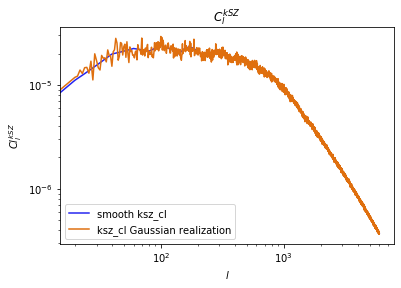

In [8]:
# get ksz cl from ksz gaussian alm
ksz_g_cl = hp.alm2cl(ksz_g_alm)
# check ksz_g_cl 
plt.loglog(smooth_ells, smooth_ksz_cl)
plt.loglog(smooth_ells, ksz_g_cl)
plt.legend([ 'smooth ksz_cl', 'ksz_cl Gaussian realization'])
plt.title('$C_{l}^{kSZ}$')
plt.xlabel('$l$')
plt.ylabel('$Cl_{l}^{kSZ}$')
plt.savefig(plot_path+'ksz_gaussian_realization.png')

In [9]:
# Write ksz_g_alm on disk
hp.write_alm(map_path+'ksz_'+ksz_type + '_g_alm_%s.fits' %(smooth_ellmax), ksz_g_alm, overwrite=True)

In [84]:
# compare Colin's late-time kSZ and websky's late-time kSZ
ksz_lt_g_alm_Colin = hp.read_alm('maps/Colin/ksz_' + 'lt_' + 'g_alm_%s.fits' %(smooth_ellmax))
ksz_ri_g_alm_websky = hp.read_alm('maps/websky/ksz_' + 'ri_' + 'g_alm_%s.fits' %(smooth_ellmax))
ksz_lt_g_alm_websky = hp.read_alm('maps/websky/ksz_' + 'lt_' + 'g_alm_%s.fits' %(smooth_ellmax))

(40, 6000)

[]

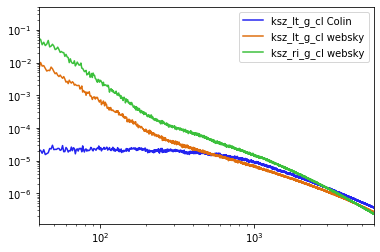

In [87]:
ksz_lt_g_cl_Colin = hp.alm2cl( ksz_lt_g_alm_Colin)
ksz_lt_g_cl_websky = hp.alm2cl( ksz_lt_g_alm_websky)
ksz_ri_g_cl_websky = hp.alm2cl( ksz_ri_g_alm_websky)
plt.plot(ksz_lt_g_cl_Colin)
plt.plot(ksz_lt_g_cl_websky)
plt.plot(ksz_ri_g_cl_websky)
plt.legend(['ksz_lt_g_cl Colin', 'ksz_lt_g_cl websky', 'ksz_ri_g_cl websky'])
plt.xlim([40, 6000])
plt.loglog()